Banking Analysis sklearn

In [ ]:
import sys

!pip install ydata-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=aadfdf088b790692454c13911c178660580a47e660e4681f644cdc4a5392adaf
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.arff to bank.arff


In [ ]:
import pandas as pd
from scipy.io import arff
import numpy as np

#data_file="german_credit.arff"
# If using other datasets then comment the above line and uncomment one of the following two lines
data_file="bank.arff"
#data_file="churn.arff"
data=arff.loadarff(data_file)

df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')
#Look at loaded data and data types
print(df.dtypes)



age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
y             object
dtype: object


In [ ]:
# Let's display first 10 records
df.head(10)


age            job  marital  education default  balance housing loan  \
0  30.0     unemployed  married    primary      no   1787.0      no   no   
1  33.0       services  married  secondary      no   4789.0     yes  yes   
2  35.0     management   single   tertiary      no   1350.0     yes   no   
3  30.0     management  married   tertiary      no   1476.0     yes  yes   
4  59.0    blue-collar  married  secondary      no      0.0     yes   no   
5  35.0     management   single   tertiary      no    747.0      no   no   
6  36.0  self-employed  married   tertiary      no    307.0     yes   no   
7  39.0     technician  married  secondary      no    147.0     yes   no   
8  41.0   entrepreneur  married   tertiary      no    221.0     yes   no   
9  43.0       services  married    primary      no    -88.0     yes  yes   

    contact   day month  duration  campaign  pdays  previous poutcome   y  
0  cellular  19.0   oct      79.0       1.0   -1.0       0.0  unknown  no  
1  cellular  11.0   may     220.0       1.0  339.0       4.0  failure  no  
2  cellular  16.0   apr     185.0       1.0  330.0       1.0  failure  no  
3   unknown   3.0   jun     199.0       4.0   -1.0       0.0  unknown  no  
4   unknown   5.0   may     226.0       1.0   -1.0       0.0  unknown  no  
5  cellular  23.0   feb     141.0       2.0  176.0       3.0  failure  no  
6  cellular  14.0   may     341.0       1.0  330.0       2.0    other  no  
7  cellular   6.0   may     151.0       2.0   -1.0       0.0  unknown  no  
8   unknown  14.0   may      57.0       2.0   -1.0       0.0  unknown  no  
9  cellular  17.0   apr     313.0       1.0  147.0       2.0  failure  no

In [ ]:
# look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   float64
 10  month      4521 non-null   object 
 11  duration   4521 non-null   float64
 12  campaign   4521 non-null   float64
 13  pdays      4521 non-null   float64
 14  previous   4521 non-null   float64
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

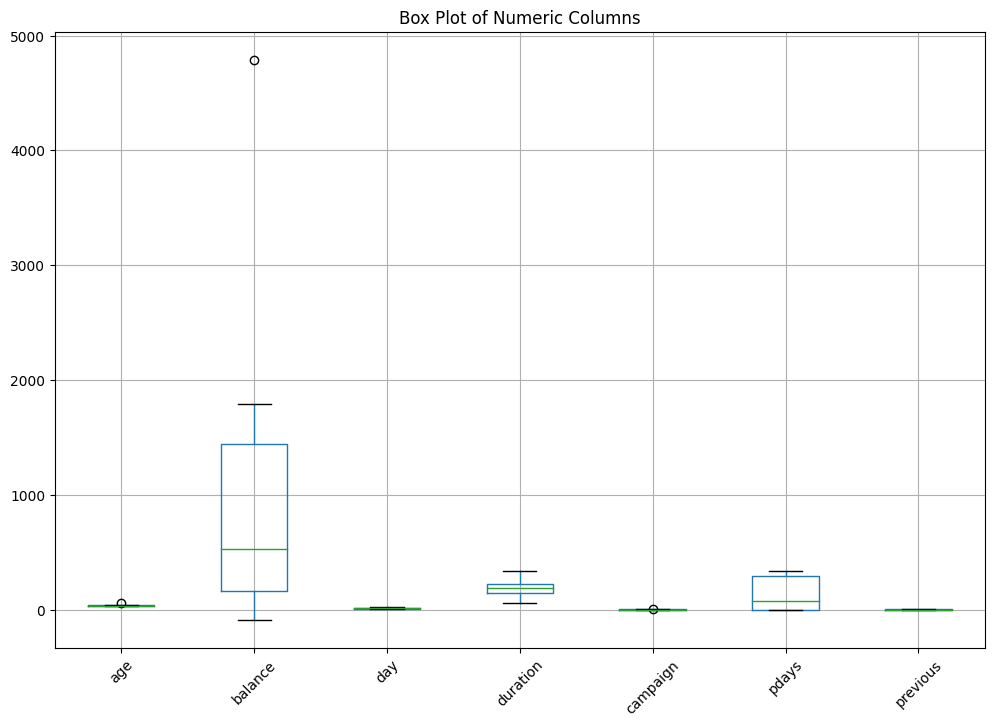

In [ ]:
# Sample data representing the statistical summary
data = {
    'age': [30, 33, 35, 30, 59, 35, 36, 39, 41, 43],
    'balance': [1787, 4789, 1350, 1476, 0, 747, 307, 147, 221, -88],
    'day': [19, 11, 16, 3, 5, 23, 14, 6, 14, 17],
    'duration': [79, 220, 185, 199, 226, 141, 341, 151, 57, 313],
    'campaign': [1, 1, 1, 4, 1, 2, 1, 2, 2, 1],
    'pdays': [-1, 339, 330, -1, -1, 176, 330, -1, -1, 147],
    'previous': [0, 4, 1, 0, 0, 3, 2, 0, 0, 2]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create box plots for each numeric column
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title('Box Plot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

**Decison tree in Python**

In [ ]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features
class_col_name='y'

feature_names=df.columns[df.columns != class_col_name ]

# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.3,random_state=1)

Below is the code to train the decision tree. I am setting max depth of the tree to 5, you can choose to change it or remove it.

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

ValueError: could not convert string to float: 'management'

In [ ]:
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

Plot the Tree

class Names ['1' '0']


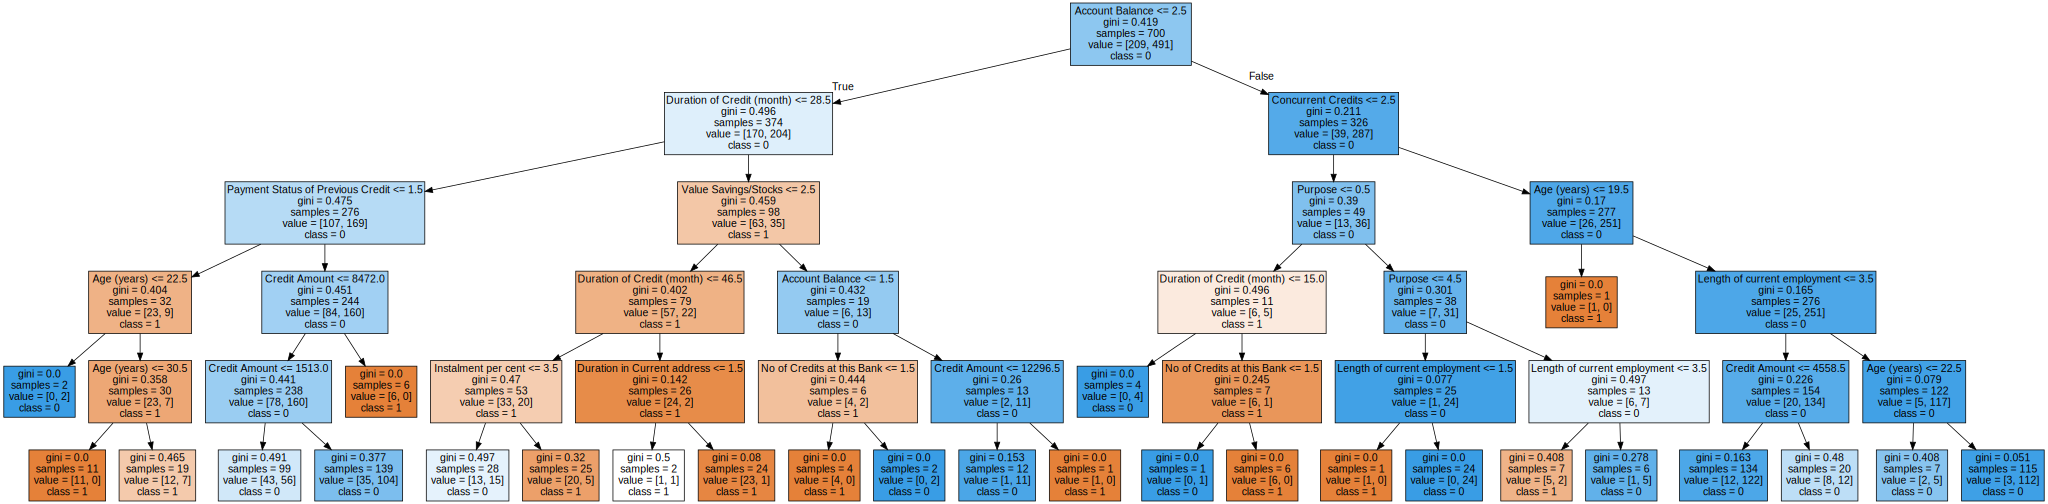

In [ ]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png")
graph



In [ ]:
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)


confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 29  62]
 [  8 201]]
TP:  201 , FP:  62 , TN:  29 , FN: 8


In [ ]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.32      0.45        91
           1       0.76      0.96      0.85       209

    accuracy                           0.77       300
   macro avg       0.77      0.64      0.65       300
weighted avg       0.77      0.77      0.73       300



In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [ ]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 21


Let's understand our Naive Bayes model

In [ ]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  20
Classes  ['0' '1']
Number of records for classes  [209. 491.]
Log prior probability for classes  [-1.20874608 -0.35463621]
Log conditional probability for each feature given a class
 [[-7.66053824 -5.09289346 -7.52920224 -7.2442712  -0.02385625 -7.77176387
  -7.16792253 -7.18335493 -7.34322437 -8.16470272 -7.27277271 -7.3616411
  -4.77281549 -7.37473764 -7.66053824 -7.98653918 -7.23113472 -8.16470272
  -7.97617639 -8.28352364]
 [-6.96381256 -5.09018055 -7.03265538 -7.02592638 -0.03094527 -7.19521844
  -6.79713562 -6.95892257 -7.02443718 -7.89278845 -6.9965557  -7.21662871
  -4.4432513  -7.02816435 -7.36613136 -7.65976479 -6.96451308 -7.8874834
  -7.68825674 -7.98173594]]


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.39      0.41      0.40        91
           1       0.74      0.72      0.73       209

    accuracy                           0.63       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.63      0.63      0.63       300



In [ ]:
#Let's create a list for our categorical columns for German dataset, we need this later
# for German Credit card
#cat_cols=["Account Balance","Payment Status of Previous Credit","Purpose","Value Savings/Stocks","Length of current employment","Sex & Marital Status"\
#          ,"Guarantors","Duration in Current address","Most valuable available asset","Concurrent Credits","Type of apartment","Occupation", \
#          "Telephone","Foreign Worker"]
#*******
#for bank dataset uncomment following line
cat_cols=["job","marital","education","default","housing","loan","contact","month","poutcome"]
#*******
#*******
# for Churn data set uncomment following line
#cat_cols=["State","Area Code", "Phone Number", "Inter Plan","VoiceMail Plan"]
#******


In [ ]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot


age  balance   day  duration  campaign  pdays  previous   y  \
0     30.0   1787.0  19.0      79.0       1.0   -1.0       0.0  no   
1     33.0   4789.0  11.0     220.0       1.0  339.0       4.0  no   
2     35.0   1350.0  16.0     185.0       1.0  330.0       1.0  no   
3     30.0   1476.0   3.0     199.0       4.0   -1.0       0.0  no   
4     59.0      0.0   5.0     226.0       1.0   -1.0       0.0  no   
...    ...      ...   ...       ...       ...    ...       ...  ..   
4516  33.0   -333.0  30.0     329.0       5.0   -1.0       0.0  no   
4517  57.0  -3313.0   9.0     153.0       1.0   -1.0       0.0  no   
4518  57.0    295.0  19.0     151.0      11.0   -1.0       0.0  no   
4519  28.0   1137.0   6.0     129.0       4.0  211.0       3.0  no   
4520  44.0   1136.0   3.0     345.0       2.0  249.0       7.0  no   

      job_admin.  job_blue-collar  ...  month_jun  month_mar  month_may  \
0          False            False  ...      False      False      False   
1          False            False  ...      False      False       True   
2          False            False  ...      False      False      False   
3          False            False  ...       True      False      False   
4          False             True  ...      False      False       True   
...          ...              ...  ...        ...        ...        ...   
4516       False            False  ...      False      False      False   
4517       False            False  ...      False      False       True   
4518       False            False  ...      False      False      False   
4519       False             True  ...      False      False      False   
4520       False            False  ...      False      False      False   

      month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0         False       True      False             False           False   
1         False      False      False              True           False   
2         False      False      False              True           False   
3         False      False      False             False           False   
4         False      False      False             False           False   
...         ...        ...        ...               ...             ...   
4516      False      False      False             False           False   
4517      False      False      False             False           False   
4518      False      False      False             False           False   
4519      False      False      False             False            True   
4520      False      False      False             False            True   

      poutcome_success  poutcome_unknown  
0                False              True  
1                False             False  
2                False             False  
3                False              True  
4                False              True  
...                ...               ...  
4516             False              True  
4517             False              True  
4518             False              True  
4519             False             False  
4520             False             False  

[4521 rows x 52 columns]

In [ ]:
####
## For Bank data set only
####
# in the case of bank data set, pdays and balance columns have negative values.
df_onehot["pdays"]=df_onehot["pdays"].apply(lambda x: 0 if x<0 else x)
df_onehot["balance"]=df_onehot["balance"].apply(lambda x: 0 if x<0 else x)


In [ ]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
#class_col_name="Creditability"
# Uncomment following line for class name for bank dataset
class_col_name="y"
# Uncomment following line for class name for Churn dataset
#class_col_name="Churn"
one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


Let's look at Naive Bayes output

In [ ]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  64
Classes  ['0' '1']
Number of records for classes  [205. 495.]
Log prior probability for classes  [-1.22807036 -0.34652257]
Log conditional probability for each feature given a class
 [[ -5.07717035  -0.02043849  -7.11378092  -4.73218569  -7.94918926
   -8.1045397   -9.0550218   -9.30014426 -11.1789151  -10.05044985
  -10.6323714  -10.5810781   -8.84942256 -10.53228794  -9.96589246
   -9.46593651 -11.09190373 -11.96737246  -9.86323831  -9.77014789
  -12.47819809 -11.3795858  -10.80422166 -12.8836632  -10.53228794
   -8.55292986 -10.5810781  -11.3795858  -11.78505091 -10.44131616
  -10.74359703  -9.72666278  -9.32831514 -10.24460587  -9.70560937
  -10.74359703  -9.17009113  -9.01246219 -10.93775305  -8.33506336
  -11.09190373 -11.63090023 -10.31871384  -9.37211776  -9.96589246
   -9.20736252  -9.81561026  -9.68499008  -9.34270387  -9.70560937
   -9.93922422 -10.86876018  -8.53338526  -9.60651846  -8.74849664
  -10.175613   -12.19051602  -9.81561026  -8.7727893

We have probailities of a lot more features now.

See evaluation metrics below.

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 50  45]
 [ 61 144]]
TP:  144 , FP:  45 , TN:  50 , FN: 61


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.45      0.53      0.49        95
           1       0.76      0.70      0.73       205

    accuracy                           0.65       300
   macro avg       0.61      0.61      0.61       300
weighted avg       0.66      0.65      0.65       300



**Let's run decision tree on one-hot encoded data**

class Names ['no' 'yes']


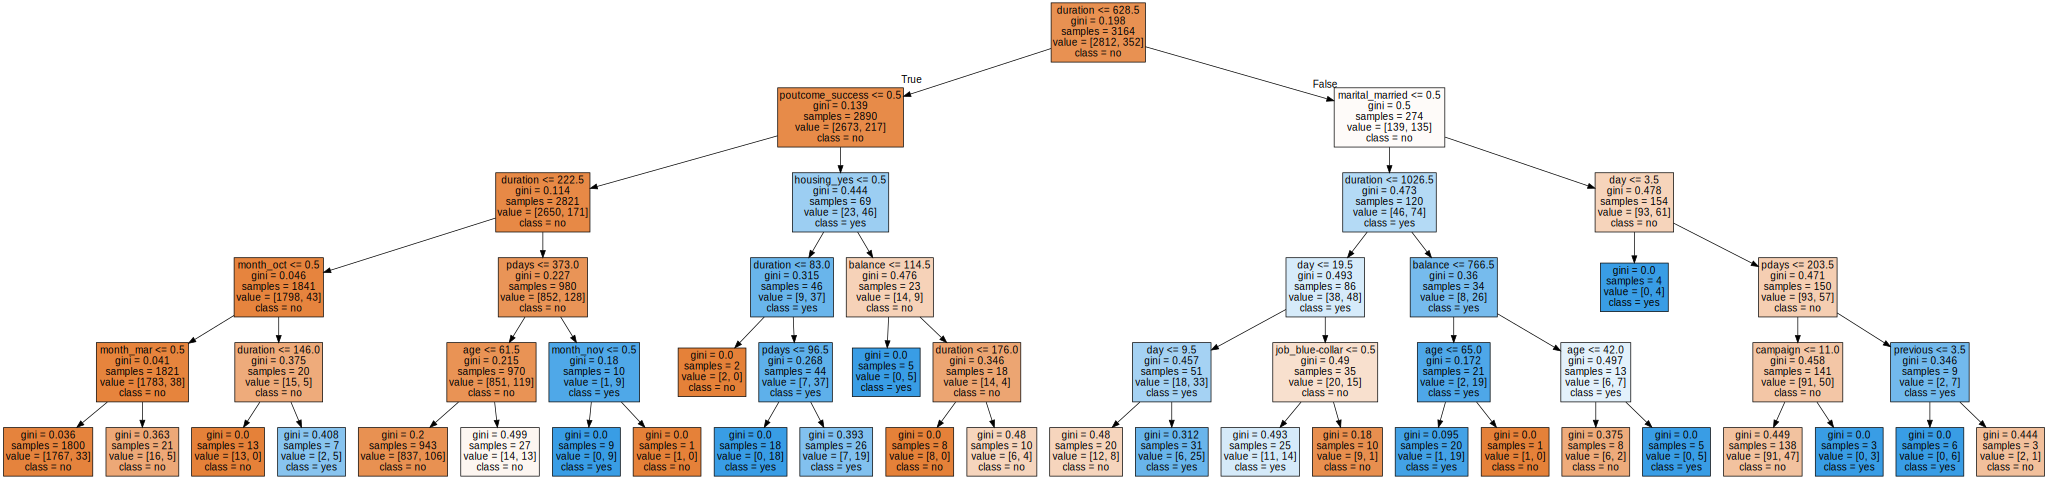

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=one_hot_feature_names,
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph


In [ ]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.91      0.97      0.94      1188
         yes       0.60      0.30      0.40       169

    accuracy                           0.89      1357
   macro avg       0.75      0.63      0.67      1357
weighted avg       0.87      0.89      0.87      1357



**Appendix**

**Exploratory Analysis**


In [ ]:

from ydata_profiling import ProfileReport

# Generate the data profiling report
report = ProfileReport(df)



In [ ]:
#Display report
report
#To save to HTML file
#report.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#df=df.drop(columns=['Phone Number'])
#df.to_csv("somename.csv")
